# 지도학습

## 2.1 분류와 회귀

분류: 여러 클래스 레이블 중 하나를 예측하는 것.
- 이진 분류: 두 개의 클래스를 분류.
- 다중 분류: 세 개 이상의 클래스를 분류.

회귀: 연속성 있는 변수를 예측하는 것.

## 2.2 일반화, 과대적합, 과소적합

- 일반화: 훈련한 모델이 처음 보는 데이터에 대해서도 정확하게 예측할 수 있도록 만드는 것.
- 과적합(Overfitting): 너무 복잡하여 테스트셋을 잘 예측하지 못하는 경우.
- 과소적합(underfitting): 너무 간단하여 정확성 떨어지는 경우.

## 2.3 지도학습 알고리즘

In [1]:
import mglearn
import matplotlib.pyplot as plt

In [2]:
X, y = mglearn.datasets.make_forge()

C:\Users\Tkay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [3]:
print(X)
print(y)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


X.shape: (26, 2)


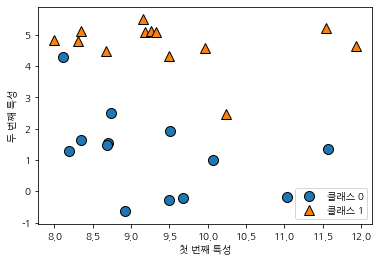

In [4]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)

회귀모델 데이터

In [5]:
 X, y = mglearn.datasets.make_wave(n_samples = 40)

In [6]:
print(X)

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]]


Text(0, 0.5, '타깃')

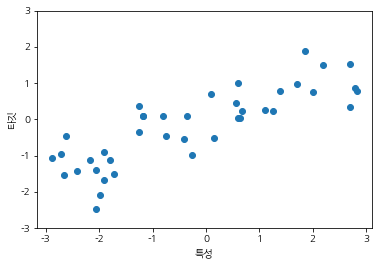

In [7]:
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")
         

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
cancer.data.shape

(569, 30)

In [10]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [12]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [17]:
import pandas as pd
import numpy as np

In [14]:
pd.DataFrame(cancer.target).value_counts()

1    357
0    212
dtype: int64

In [20]:
print("클래스별 샘플 개수:\n",
      {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})


클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [ ]:
# 회귀분석용 실제 데이터셋: 보스턴 주택가격 데이터셋

In [21]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [22]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


### 2.3.2. KNN(k-nearest neighborhood)

C:\Users\Tkay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


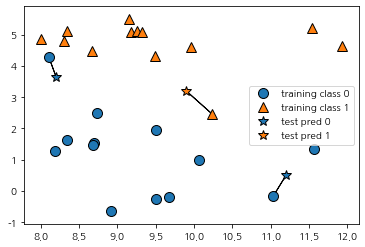

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [25]:
import warnings
warnings.filterwarnings("ignore")

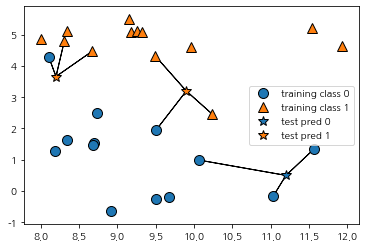

In [26]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [37]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [39]:
print(X_train.shape, y_train.shape)


(19, 2) (19,)


In [40]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
pred = clf.predict(X_test)

In [44]:
np.mean(pred == y_test)

0.8571428571428571

In [47]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


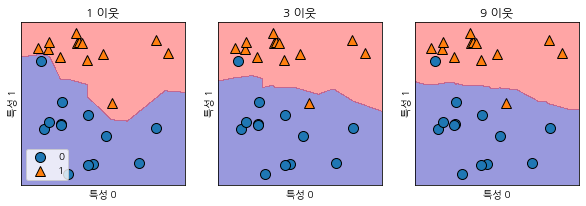

In [50]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill= True, eps = 0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc = 3)

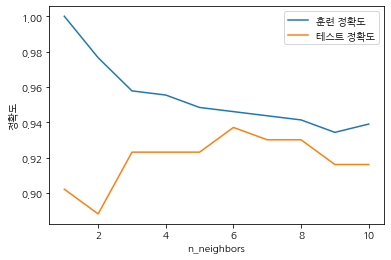

In [53]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

train_acc = []
test_acc = []

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, train_acc, label = "훈련 정확도")
plt.plot(neighbors_settings, test_acc, label = "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

In [ ]:
# k-nearest neighborhood regression

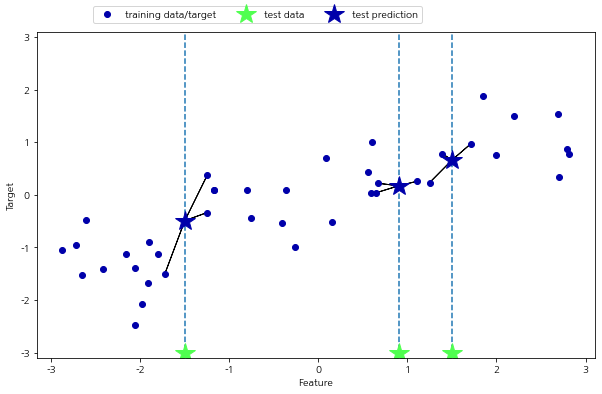

In [57]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [58]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples = 40)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


In [60]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [61]:
reg.score(X_train, y_train)

0.8194343929538755

In [62]:
reg.score(X_test, y_test)

0.8344172446249605

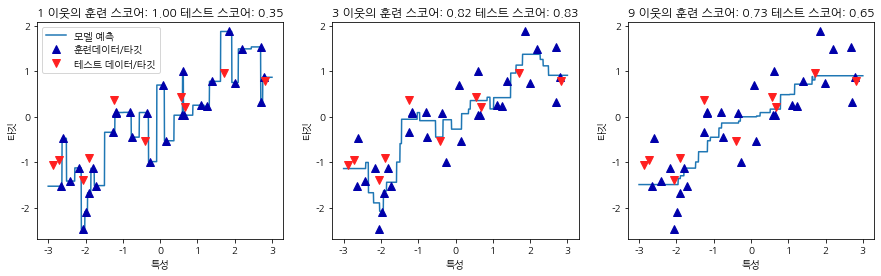

In [69]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련데이터/타깃",
               "테스트 데이터/타깃"], loc = "best")


### 2.3.3 선형모델

w[0]: 0.393906  b: -0.031804


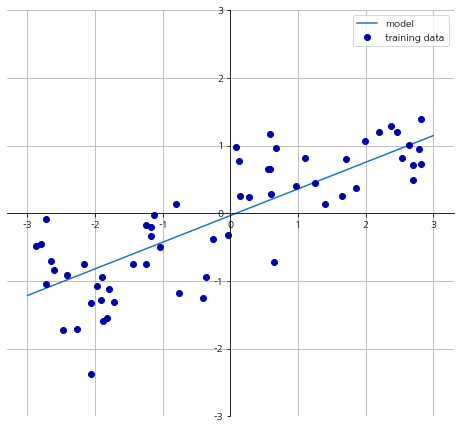

In [70]:
mglearn.plots.plot_linear_regression_wave()

In [79]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
X_train.shape

(45, 1)

In [81]:
lr.coef_

array([0.39390555])

In [82]:
lr.intercept_

-0.03180434302675973

In [85]:
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.6700890315075756 0.6593368596863701


In [86]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [88]:
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.9520519609032729 0.6074721959665745


In [89]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train), ridge.score(X_test, y_test))

0.8857966585170942 0.7527683481744756


In [92]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print(ridge10.score(X_train, y_train), ridge10.score(X_test, y_test))

0.7882787115369615 0.6359411489177311


In [93]:
ridge01 = Ridge(alpha = .1).fit(X_train, y_train)
print(ridge01.score(X_train, y_train), ridge01.score(X_test, y_test))

0.9282273685001982 0.772206793647994


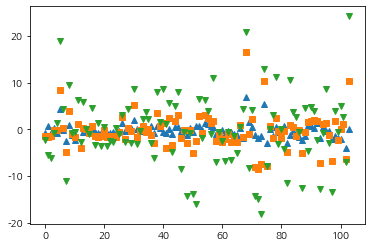

In [94]:
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

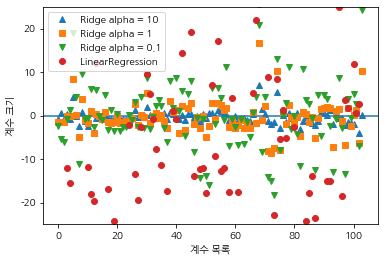

In [100]:
plt.plot(ridge10.coef_, '^', label = "Ridge alpha = 10")
plt.plot(ridge.coef_, 's', label = "Ridge alpha = 1")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

         

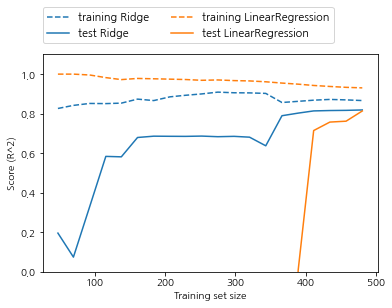

In [101]:
mglearn.plots.plot_ridge_n_samples()

In [103]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train), lasso.score(X_test, y_test), np.sum(lasso.coef_ !=0))

0.29323768991114607 0.20937503255272294 4


In [106]:
lasso001 = Lasso(alpha = 0.01).fit(X_train, y_train)
print(lasso001.score(X_train, y_train), lasso001.score(X_test, y_test), np.sum(lasso001.coef_ !=0))

0.8961122320864718 0.7677995670886715 32


In [107]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print(lasso001.score(X_train, y_train), lasso001.score(X_test, y_test), np.sum(lasso001.coef_ !=0))

0.8962226511086501 0.7656571174549989 33


In [108]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print(lasso00001.score(X_train, y_train), lasso00001.score(X_test, y_test), np.sum(lasso00001.coef_ !=0))

0.9507158754515462 0.6437467421273407 96


(-25.0, 25.0)

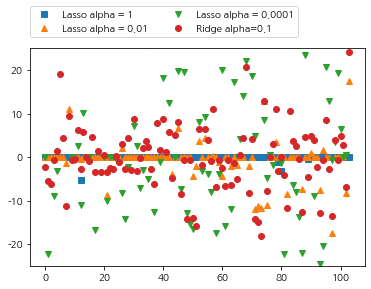

In [112]:
plt.plot(lasso.coef_, "s", label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, "^", label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, "v", label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha=0.1")
plt.legend(ncol = 2, loc = (0, 1.05))
plt.ylim(-25, 25)

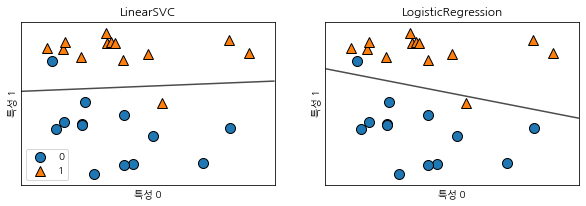

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5, ax= ax ,alpha= 0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend()


